<a href="https://colab.research.google.com/github/nandu-21/Daily-assingment/blob/main/Assignment%20(9).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Epoch 1/30


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - accuracy: 0.3309 - loss: 0.8034 - val_accuracy: 0.3875 - val_loss: 0.7625
Epoch 2/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.4452 - loss: 0.7216 - val_accuracy: 0.4812 - val_loss: 0.6893
Epoch 3/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5158 - loss: 0.6657 - val_accuracy: 0.5875 - val_loss: 0.6246
Epoch 4/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6213 - loss: 0.6019 - val_accuracy: 0.7563 - val_loss: 0.5674
Epoch 5/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7365 - loss: 0.5481 - val_accuracy: 0.7688 - val_loss: 0.5178
Epoch 6/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.7832 - loss: 0.4974 - val_accuracy: 0.7875 - val_loss: 0.4771
Epoch 7/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.8039 - loss: 0.4693 - val_accuracy: 0.8188 - val_loss: 0.4412
Epoch 8/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - accuracy: 0.8307 - loss: 0.4229 - val_accuracy: 0.8250 - val_loss: 0.41

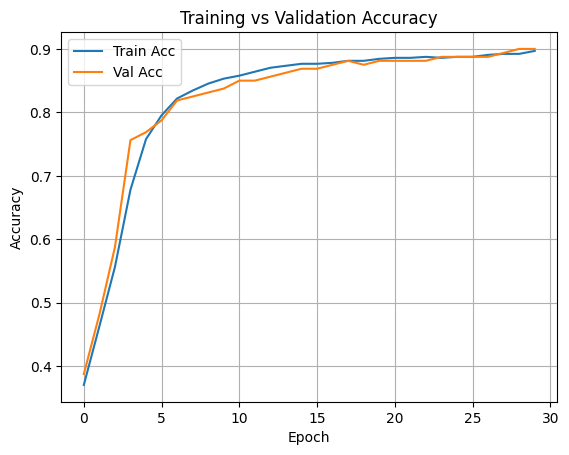

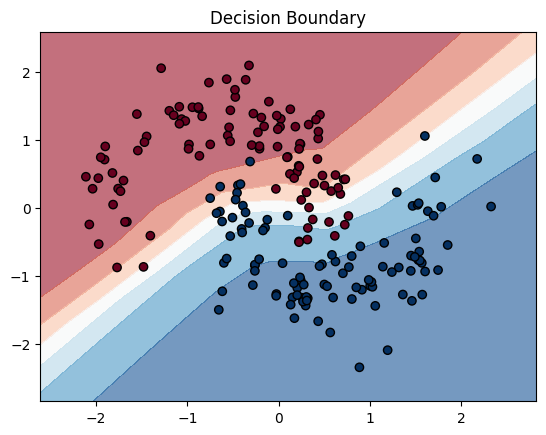

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# 1. Generate synthetic binary classification data
X, y = make_moons(n_samples=1000, noise=0.2, random_state=42)

# 2. Split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Normalize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# 4. Build MLP model (try different activation functions and layers)
model = Sequential([
    Dense(16, activation='relu', input_shape=(2,)),   # Hidden Layer 1
    Dense(8, activation='tanh'),                      # Hidden Layer 2
    Dense(1, activation='sigmoid')                    # Output Layer (binary)
])

# 5. Compile model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# 6. Train the model
history = model.fit(X_train, y_train, epochs=30, batch_size=32,
                    validation_split=0.2, verbose=1)

# 7. Evaluate on test set
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"\n✅ Test Accuracy: {test_acc:.4f}")

# 8. Plot training history
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training vs Validation Accuracy')
plt.legend()
plt.grid(True)
plt.show()

# 9. Optional: Visualize decision boundary
def plot_decision_boundary(model, X, y):
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    h = 0.01  # step size in the mesh

    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    grid = np.c_[xx.ravel(), yy.ravel()]
    probs = model.predict(grid, verbose=0).reshape(xx.shape)

    plt.contourf(xx, yy, probs, cmap=plt.cm.RdBu, alpha=0.6)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdBu, edgecolors='k')
    plt.title('Decision Boundary')
    plt.show()

plot_decision_boundary(model, X_test, y_test)

Epoch 1/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 22s 22ms/step - accuracy: 0.7571 - loss: 0.7999 - val_accuracy: 0.8622 - val_loss: 0.3915
Epoch 2/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 8s 10ms/step - accuracy: 0.8640 - loss: 0.3777 - val_accuracy: 0.8674 - val_loss: 0.3691
Epoch 3/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 9s 12ms/step - accuracy: 0.8776 - loss: 0.3343 - val_accuracy: 0.8755 - val_loss: 0.3400
Epoch 4/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 10s 12ms/step - accuracy: 0.8872 - loss: 0.3071 - val_accuracy: 0.8827 - val_loss: 0.3267
Epoch 5/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 9s 10ms/step - accuracy: 0.8962 - loss: 0.2818 - val_accuracy: 0.8881 - val_loss: 0.3200
Epoch 6/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 9s 12ms/step - accuracy: 0.9004 - loss: 0.2681 - val_accuracy: 0.8752 - val_loss: 0.3337
Epoch 7/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 8s 11ms/step - accuracy: 0.9057 - loss: 0.2510 - val_accuracy: 0.8878 - val_loss: 0.3084
Epoch 8/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 9s 10ms/step - accuracy: 0.9102 - loss: 0.2399 - val_ac

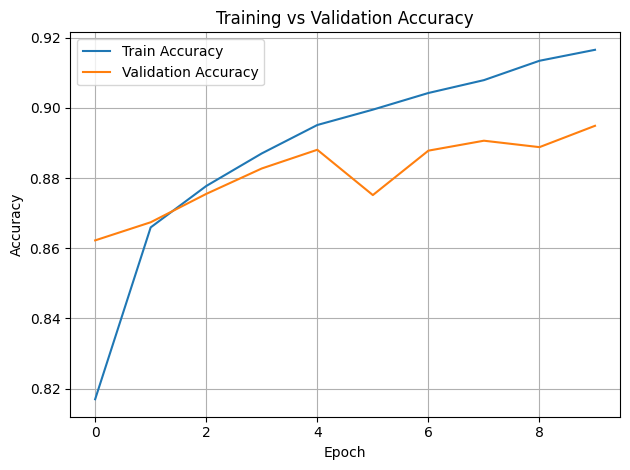

In [7]:
# Install TensorFlow if needed:
# pip install tensorflow matplotlib

import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

# 1. Load and preprocess data
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
x_train = x_train / 255.0
x_test = x_test / 255.0
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# 2. Build the model (experiment with activations/layers)
model = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(256, activation='relu'),         # Hidden Layer 1 (ReLU)
    Dense(128, activation='tanh'),         # Hidden Layer 2 (Tanh)
    Dense(64, activation='sigmoid'),       # Hidden Layer 3 (Sigmoid)
    Dense(10, activation='softmax')        # Output Layer (Softmax)
])

# 3. Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# 4. Train the model
history = model.fit(x_train, y_train,
                    validation_split=0.2,
                    epochs=10,
                    batch_size=64,
                    verbose=1)

# 5. Evaluate the model
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=0)
print(f"\n✅ Test Accuracy: {test_acc:.4f}")

# 6. Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training vs Validation Accuracy')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()